# Solidification simulations

[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/phasesresearchlab/psu-matse410/master?urlpath=lab)

We'll look at solidification in the Al-Zn system for an example Al-30Zn alloy.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pycalphad import Database, binplot, variables as v

Load the database file for this system

In [2]:
dbf = Database('alzn_mey.tdb')
comps = ['AL', 'ZN', 'VA']
phases = sorted(dbf.phases.keys())

CPU times: user 6.62 s, sys: 317 ms, total: 6.94 s
Wall time: 8.09 s


<Axes: title={'center': 'AL-ZN'}, xlabel='X(ZN)', ylabel='Temperature (K)'>

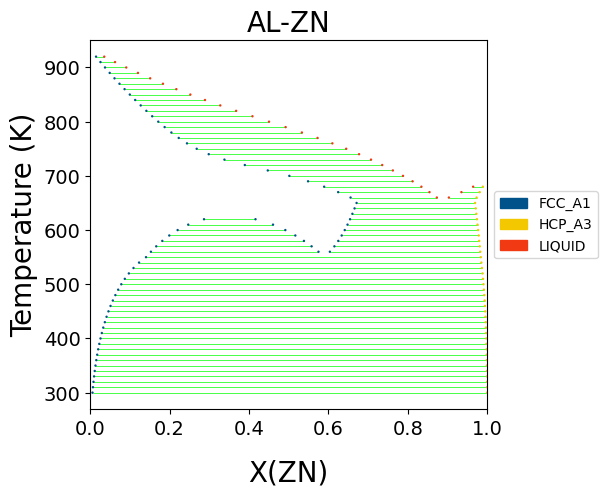

In [3]:
%%time
binplot(dbf, comps, phases, {v.P: 101325, v.N: 1, v.T: (300, 1000, 10), v.X('ZN'): (0, 1, 0.01)})

## Equilibrium Solidification

### Simulation

In [4]:
%%time

from scheil import simulate_equilibrium_solidification

initial_composition = {v.X('ZN'): 0.3}
start_temperature = 860

eq_sol_res = simulate_equilibrium_solidification(dbf, comps, phases, initial_composition, start_temperature, step_temperature=1.0)

CPU times: user 981 ms, sys: 84.7 ms, total: 1.07 s
Wall time: 2.08 s


### Solidification path

The solidification path follows the overall composition. 

CPU times: user 9.83 s, sys: 90.3 ms, total: 9.92 s
Wall time: 10 s


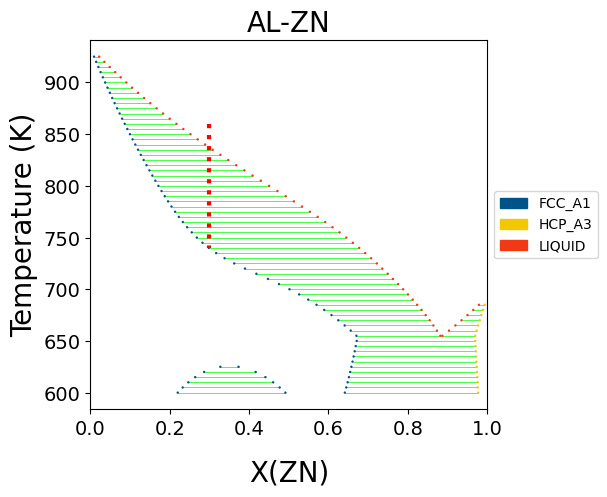

In [5]:
%%time
ax = binplot(dbf, comps, phases, {v.P: 101325, v.N: 1, v.T: (600, 1000, 5), v.X('ZN'): (0, 1, 0.01)})
ax.plot(np.ones(len(eq_sol_res.temperatures))*0.3, eq_sol_res.temperatures, linestyle=':', color='red', lw=3)

### Phase fractions

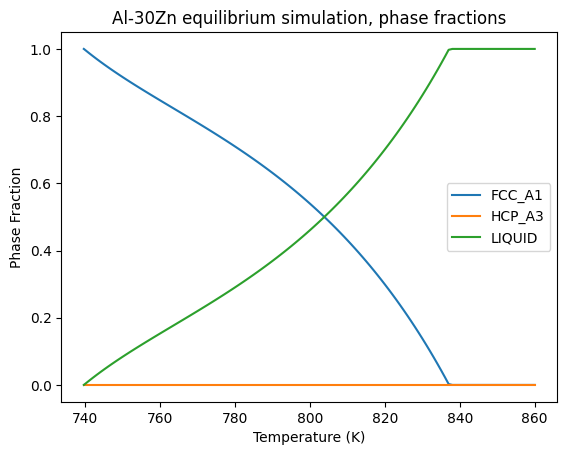

In [6]:
for phase_name, amounts in eq_sol_res.cum_phase_amounts.items():
    plt.plot(eq_sol_res.temperatures, amounts, label=phase_name)
plt.plot(eq_sol_res.temperatures, eq_sol_res.fraction_liquid, label='LIQUID')
plt.ylabel('Phase Fraction')
plt.xlabel('Temperature (K)')
plt.title('Al-30Zn equilibrium simulation, phase fractions')
plt.legend(loc='best')
plt.show()

## Scheil solidification

In [7]:
%%time

from scheil import simulate_scheil_solidification

initial_composition = {v.X('ZN'): 0.3}
start_temperature = 860

sol_res = simulate_scheil_solidification(dbf, comps, phases, initial_composition, start_temperature, step_temperature=1.0)

CPU times: user 1.81 s, sys: 45.7 ms, total: 1.86 s
Wall time: 1.98 s


### Solidification path

In Scheil solidification, the solidification path follows the liquidus composition, since the liquid has perfect mixing and is in local equilibrium with the solid at each temperature.

CPU times: user 9.43 s, sys: 99.4 ms, total: 9.53 s
Wall time: 9.62 s


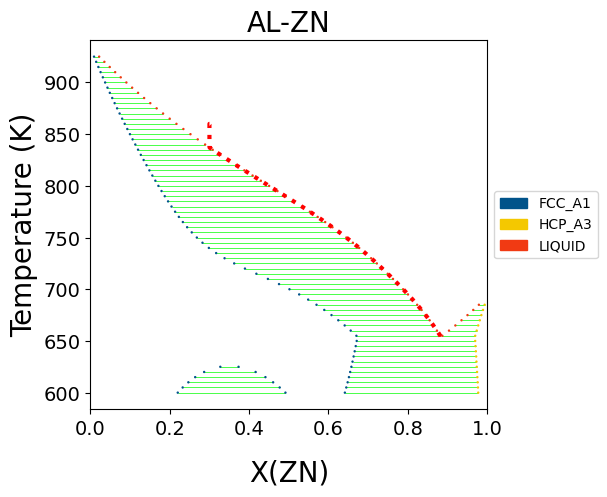

In [8]:
%%time
ax = binplot(dbf, comps, phases, {v.P: 101325, v.N: 1, v.T: (600, 1000, 5), v.X('ZN'): (0, 1, 0.01)})
ax.plot(sol_res.x_liquid['ZN'], sol_res.temperatures, linestyle=':', color='red', lw=3)

### Phase fractions

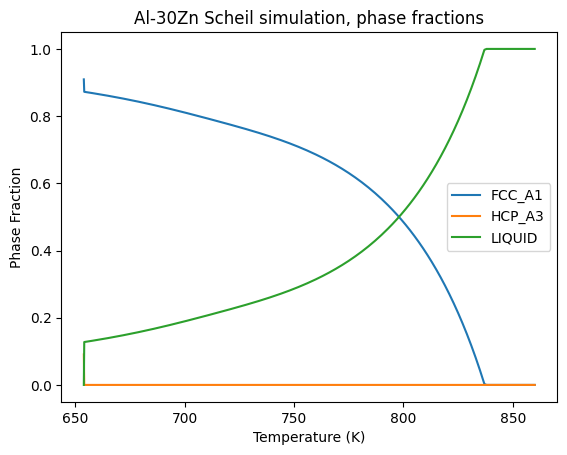

In [9]:
for phase_name, amounts in sol_res.cum_phase_amounts.items():
    plt.plot(sol_res.temperatures, amounts, label=phase_name)
plt.plot(sol_res.temperatures, sol_res.fraction_liquid, label='LIQUID')
plt.ylabel('Phase Fraction')
plt.xlabel('Temperature (K)')
plt.title('Al-30Zn Scheil simulation, phase fractions')
plt.legend(loc='best')
plt.show()

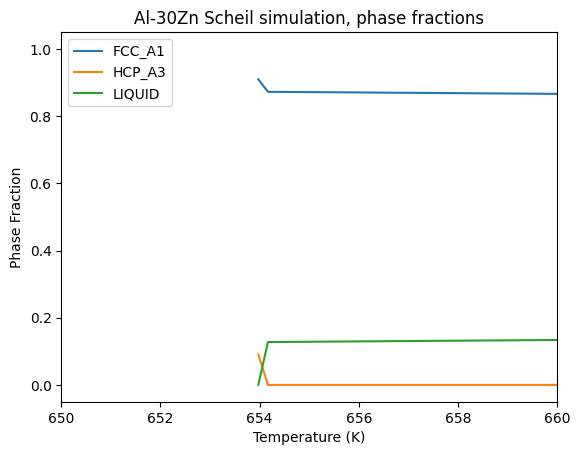

In [10]:
for phase_name, amounts in sol_res.cum_phase_amounts.items():
    plt.plot(sol_res.temperatures, amounts, label=phase_name)
plt.plot(sol_res.temperatures, sol_res.fraction_liquid, label='LIQUID')
plt.ylabel('Phase Fraction')
plt.xlabel('Temperature (K)')
plt.title('Al-30Zn Scheil simulation, phase fractions')
plt.legend(loc='best')
plt.xlim(650, 660)
plt.show()